# Homework 2

**Start date:** *29th January 2018*

**Due date:** *11th February 2018, 11:55 pm*

## How to Submit

When you have completed the exercises and everything has finsihed running, click on 'File' in the menu-bar and then 'Download .ipynb'. This file must be submitted to Moodle named as **studentnumber_DL_hw2.ipynb** before the deadline above.

Also send a **sharable link** to the notebook at the following email: ucl.coursework.submit@gmail.com. You can also make it sharable via link to everyone, up to you.

### IMPORTANT
Please make sure you submission includes **all results/plots/tables** required for grading. We will not re-run your code.

## The Data

### Handwritten Digit Recognition Dataset (MNIST)

In this assignment we will be using the [MNIST digit dataset](https://yann.lecun.com/exdb/mnist/). 

The dataset contains images of hand-written digits ($0-9$), and the corresponding labels. 

The images have a resolution of $28\times 28$ pixels.

### The MNIST Dataset in TensorFlow

You can use the tensorflow build-in functionality to download and import the dataset into python (see *Setup* section below). But note that this will be the only usage of TensorFlow in this assignment.

## The Assignment

### Objectives

This assignment will be mirroring the first assignment (DL_hw1), but this time you are **not allowed to use any of the Tensorflow functionality for specifing nor optimizing** your neural network models. 
You will now use your **own implementations** of different neural network models (labelled Model 1-4, and described in the corresponding sections of the Colab).

As before, you will train these models to classify hand written digits from the Mnist dataset. 

Keep in mind, the purpose of this exercise is to implement and optimize your own neural networks
architectures without the toolbox/library tailored to do so. This also means, in order to train and evaluate your models, you will need to implement your own optimization procedure. You are to use the same cross-entropy loss as before and your own implementation of SGD.

#### Additional instruction:

**Do not use any other libraries than the ones provided in the imports cell.** You should be able to do everything via *numpy* (especially for the convolutional layer, rely on the in-built matrix/tensor multiplication that numpy offers).  

There are a few questions at the end of the colab. **Before doing any coding, please take look at Question 1** -- this should help you with the implementations, especially the optimization part.


### Variable Initialization

Initialize the variables containing the parameters using [Xavier initialization](http://proceedings.mlr.press/v9/glorot10a.html).

### Hyper-parameters

For each of these models you will be requested to run experiments with different hyper-parameters.

More specifically, you will be requested to try 3 sets of hyper-parameters per model, and report the resulting model accuracy.

Each combination of hyper-parameter will specify how to set each of the following:

- **num_epochs**: Number of iterations through the training section of the dataset [*a positive integer*].

- **learning_rate**: Learning rate used by the gradient descent optimizer [*a scalar between 0 and 1*]

In all experiments use a *batch_size* of 100.

### Loss function
All models, should be trained as to minimize the **cross-entropy loss** function:
$$
\mathrm{loss}
~~=~~
-\sum_{i=1}^N \log p(y_i|x_i, \theta)
~~=~~
-\sum_{i=1}^N \log{ \underbrace{\left(\frac{\exp(z_{i}[y_i])}{\sum_{c=1}^{10} \exp(z_{i}[c])}\right)}_{\text{softmax output}}}
~~=~~
\sum_{i=1}^N \left( -z_{i}[y_i] + \log{\left( \sum_{c=1}^{10} \exp(z_{i}[c]) \right)} \right)$$
where $z \in \mathbb{R}^{10}$ is the input to the softmax layer and $z{[c]}$ denotes the $c$-th entry of vector $z$. And $i$ is a index for the dataset $\{(x_i, y_i)\}_{i=1}^N$.


### Optimization

Use **stochastic gradient descent (SGD)** for optimizing the loss function. Sum over the batch.


### Training and Evaluation

The tensorflow built-in functionality for downloading and importing the dataset into python returns a Datasets object.

This object will have three attributes: 

- train

- validation

- test

Use only the **train** data in order to optimize the model.

Use *datasets.train.next_batch(100)* in order to sample mini-batches of data.

Every 20000 training samples (i.e. every 200 updates to the model), interrupt training and measure the accuracy of the model, 

each time evaluate the accuracy of the model both on 20% of the **train** set and on the entire **test** set.

### Reporting

For each model i, you will collect the learning curves associated to each combination of hyper-parameters.

Use the utility function `plot_learning_curves` to plot these learning curves,

and the and utility function `plot_summary_table` to generate a summary table of results.

For each run collect the train and test curves in a tuple, together with the hyper-parameters.

    experiments_task_i = [

       (num_epochs_1, learning_rate_1), train_accuracy_1, test_accuracy_1),
    
       (num_epochs_2, learning_rate_2), train_accuracy_2, test_accuracy_2),
    
       (num_epochs_3, learning_rate_3), train_accuracy_3, test_accuracy_3)]


### Hint: 

Remind yourselves of the chain rule and read through the lecture notes on back-propagation (computing 
the gradients by recursively applying the chain rule). This is a general procedure that applies to all model
architectures you will have to code in the following steps. Thus, you are strongly encourage to implement an
optimization procedure that generalizes and can be re-used to train all your models. Recall the only things
that you will need for each layer are: 

(i) the gradients of layer with respect to its input

(ii) the gradients with respect to its parameters, if any.

(See Question 1).


Also from the previous assignment, you should have a good idea of what to expect, both terms of behavior and relative performance. (To keep everything comparable, we kept all the hyperparameters and reporting the same).

# Imports and utility functions (do not modify!)

In [0]:
# Import useful libraries.
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from numpy import * 

# Global variables.
log_period_samples = 20000
batch_size = 100

# Import dataset with one-hot encoding of the class labels.
def get_data():
  return input_data.read_data_sets("MNIST_data/", one_hot=True)

# Placeholders to feed train and test data into the graph.
# Since batch dimension is 'None', we can reuse them both for train and eval.
def get_placeholders():
  x = tf.placeholder(tf.float32, [None, 784])
  y_ = tf.placeholder(tf.float32, [None, 10])
  return x, y_

# Plot learning curves of experiments
def plot_learning_curves(experiment_data):
  # Generate figure.
  fig, axes = plt.subplots(3, 4, figsize=(22,12))
  st = fig.suptitle(
      "Learning Curves for all Tasks and Hyper-parameter settings",
      fontsize="x-large")
  # Plot all learning curves.
  for i, results in enumerate(experiment_data):
    for j, (setting, train_accuracy, test_accuracy) in enumerate(results):
      # Plot.
      xs = [x * log_period_samples for x in range(1, len(train_accuracy)+1)]
      axes[j, i].plot(xs, train_accuracy, label='train_accuracy')
      axes[j, i].plot(xs, test_accuracy, label='test_accuracy')
      # Prettify individual plots.
      axes[j, i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
      axes[j, i].set_xlabel('Number of samples processed')
      axes[j, i].set_ylabel('Epochs: {}, Learning rate: {}.  Accuracy'.format(*setting))
      axes[j, i].set_title('Task {}'.format(i + 1))
      axes[j, i].legend()
  # Prettify overall figure.
  plt.tight_layout()
  st.set_y(0.95)
  fig.subplots_adjust(top=0.91)
  plt.show()

# Generate summary table of results.
def plot_summary_table(experiment_data):
  # Fill Data.
  cell_text = []
  rows = []
  columns = ['Setting 1', 'Setting 2', 'Setting 3']
  for i, results in enumerate(experiment_data):
    rows.append('Model {}'.format(i + 1))
    cell_text.append([])
    for j, (setting, train_accuracy, test_accuracy) in enumerate(results):
      cell_text[i].append(test_accuracy[-1])
  # Generate Table.
  fig=plt.figure(frameon=False)
  ax = plt.gca()
  the_table = ax.table(
      cellText=cell_text,
      rowLabels=rows,
      colLabels=columns,
      loc='center')
  the_table.scale(1, 4)
  # Prettify.
  ax.patch.set_facecolor('None')
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)
    
def softmax(x):
    mx = np.amax(x,axis=1,keepdims = True)
    x_exp = np.exp(x - mx)
    x_sum = np.sum(x_exp, axis = 1, keepdims = True)
    res = x_exp / x_sum
    return res
  
def cross_entropy_loss(y, labels):
	return np.mean(-np.sum(labels * np.log(y), axis=1 ))

def training_linear_network(x, w, b):
  y = np.matmul(x, w) + b
  return y

def delta_cross_entropy(softmax_y, labels):
  grad = softmax_y - labels
  return grad

def ReLU(x):
    return x * (x > 0)

def dReLU(x):
    return 1. * (x > 0)
  
def zero_pad(X, pad):
    X_pad = np.pad(X, ((0,0), (pad,pad),(pad,pad), (0,0)), 'constant', constant_values = 0)
    return X_pad
  
def conv_single_step(a_slice_prev, W):
  # Element-wise product between a_slice and W. Do not add the bias yet.
  s = W * a_slice_prev
  # Sum over all entries of the volume s.
  Z = np.sum(s)
  return Z

# Model 1 (10 pts)

### Model

Train a neural network model consisting of 1 linear layer, followed by a softmax:

(input $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.0001

- *num_epochs*=5, *learning_rate*=0.005

- *num_epochs*=5, *learning_rate*=0.1

In [0]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task1 = []
settings = [(5, 0.0001), (5, 0.005), (5, 0.1)]

In [4]:
print('Training Model 1')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:

  # Reset graph, recreate placeholders and dataset.
  mnist = get_data()
  eval_mnist = get_data()

  #####################################################
  # Define model, loss, update and evaluation metric. #
  w = np.random.randn(784, 10) * 0.0001
  b = np.zeros((1, 10))
  #####################################################

  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  while mnist.train.epochs_completed < num_epochs:
   
    # Update.
    i += 1
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)

    #################
    # Training step #

    # forward propagate
    y = training_linear_network(batch_xs, w, b)
    # Softmax
    y_softmax = softmax(y)
  
    # back propagate
    # Calculate delta cross entropy loss
    d_y = delta_cross_entropy(y_softmax, batch_ys)
            
    d_w = np.matmul(d_y.T, batch_xs)/100.0  
    
    d_b = np.sum(d_y,axis=0)/100.0
    
    # update b
    b += - learning_rate * d_b
    
    # update w
    w += - learning_rate * d_w.T
    
    #################

    # Periodically evaluate.
    if i % log_period_updates == 0:
      
      #####################################
      # Compute and store train accuracy. #
      train_size = int(0.2*len(eval_mnist.train.labels))
      x_train, y_train = eval_mnist.train.next_batch(train_size)
      # forward propagate
      y = training_linear_network(x_train, w, b)
      # Softmax
      y_softmax = softmax(y)
      
      diff_y = np.sum(np.argmax(y_softmax, 1) == np.argmax(y_train, 1))
      train_accuracy.append(diff_y/11000.)   
      print'train accurancy:', (diff_y/11000.)
      #####################################

      #####################################
      # Compute and store test accuracy.  #
      x_test = eval_mnist.test.images
      y_test = eval_mnist.test.labels
      
#       test_size = int(0.2*len(eval_mnist.test.labels))
#       x_test, y_test = eval_mnist.test.next_batch(test_size)

      # forward propagate
      y = training_linear_network(x_test, w, b)
      # Softmax
      y_softmax = softmax(y)
      
      diff_y = np.sum(np.argmax(y_softmax, 1) == np.argmax(y_test, 1))
      test_accuracy.append(diff_y/10000.)   
      print'test accurancy:', (diff_y/10000.)
      #####################################

  experiments_task1.append(
      ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 1
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
train accurancy: 0.654
test accurancy: 0.6591
train accurancy: 0.682
test accurancy: 0.69
train accurancy: 0.6860909090909091
test accurancy: 0.6901
train accurancy: 0.6910909090909091
test accurancy: 0.6942
train accurancy: 0.6913636363636364
test accurancy: 0.7005
train accurancy: 0.7033636363636364
test accurancy: 0.7066
train accura

train accurancy: 0.9111818181818182
test accurancy: 0.9171


In [6]:
print(experiments_task1)

[((5, 0.0001), [0.654, 0.682, 0.6860909090909091, 0.6910909090909091, 0.6913636363636364, 0.7033636363636364, 0.706, 0.7159090909090909, 0.7103636363636363, 0.712, 0.7212727272727273, 0.7255454545454545, 0.723909090909091], [0.6591, 0.69, 0.6901, 0.6942, 0.7005, 0.7066, 0.7096, 0.7164, 0.7184, 0.722, 0.7255, 0.7271, 0.7288]), ((5, 0.005), [0.7659090909090909, 0.8061818181818182, 0.8195454545454546, 0.8346363636363636, 0.841, 0.8447272727272728, 0.8506363636363636, 0.851909090909091, 0.8616363636363636, 0.8618181818181818, 0.865909090909091, 0.8681818181818182, 0.8642727272727273], [0.7805, 0.8191, 0.8364, 0.8421, 0.8493, 0.8575, 0.8619, 0.8642, 0.8684, 0.8713, 0.8727, 0.8744, 0.8776]), ((5, 0.1), [0.8738181818181818, 0.8869090909090909, 0.8949090909090909, 0.9045454545454545, 0.9042727272727272, 0.9052727272727272, 0.9062727272727272, 0.9091818181818182, 0.9094545454545454, 0.9123636363636364, 0.9116363636363637, 0.9136363636363637, 0.9111818181818182], [0.8855, 0.8973, 0.9046, 0.9088,

In [0]:
experiments_task1 = [((5, 0.0001), [0.654, 0.682, 0.6860909090909091, 0.6910909090909091, 0.6913636363636364, 0.7033636363636364, 0.706, 0.7159090909090909, 0.7103636363636363, 0.712, 0.7212727272727273, 0.7255454545454545, 0.723909090909091], [0.6591, 0.69, 0.6901, 0.6942, 0.7005, 0.7066, 0.7096, 0.7164, 0.7184, 0.722, 0.7255, 0.7271, 0.7288]), ((5, 0.005), [0.7659090909090909, 0.8061818181818182, 0.8195454545454546, 0.8346363636363636, 0.841, 0.8447272727272728, 0.8506363636363636, 0.851909090909091, 0.8616363636363636, 0.8618181818181818, 0.865909090909091, 0.8681818181818182, 0.8642727272727273], [0.7805, 0.8191, 0.8364, 0.8421, 0.8493, 0.8575, 0.8619, 0.8642, 0.8684, 0.8713, 0.8727, 0.8744, 0.8776]), ((5, 0.1), [0.8738181818181818, 0.8869090909090909, 0.8949090909090909, 0.9045454545454545, 0.9042727272727272, 0.9052727272727272, 0.9062727272727272, 0.9091818181818182, 0.9094545454545454, 0.9123636363636364, 0.9116363636363637, 0.9136363636363637, 0.9111818181818182], [0.8855, 0.8973, 0.9046, 0.9088, 0.9082, 0.9123, 0.9131, 0.9139, 0.9162, 0.9165, 0.9167, 0.9175, 0.9171])]

# Model 2 (15 pts)

1 hidden layer (32 units) with a ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=15, *learning_rate*=0.0001

- *num_epochs*=15, *learning_rate*=0.005

- *num_epochs*=15, *learning_rate*=0.1 

In [0]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task2 = []
settings = [(15, 0.0001), (15, 0.005), (15, 0.1)]

In [7]:
print('Training Model 2')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  # non-linear layer parameter
  w_1 = np.random.randn(784, 32)* 0.1
  b_1 = np.random.randn(1, 32)* 0.01
  
  # linear layer parameter
  w_2 = np.random.randn(32, 10)* 0.1
  b_2 = np.random.randn(1, 10)* 0.01
  #####################################################

  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  while mnist.train.epochs_completed < num_epochs:

    # Update.
    i += 1
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)

    #################
    # Training step #
    
    """forward propagate"""    
    # Non-linear model
    y_1 = training_linear_network(batch_xs, w_1, b_1)
    
    # non-linear Relu function
    y_1_relu = ReLU(y_1)
    
    # Linear model 
    y_2 = training_linear_network(y_1_relu, w_2, b_2)
        
    # Softmax fucntion
    y_softmax = softmax(y_2)
  
    """back propagate"""
    # Calculate delta cross entropy loss
    d_y_2 = delta_cross_entropy(y_softmax, batch_ys)
    
    # Calculate layer 2 delta weight and bias
    d_w_2 = np.matmul(y_1_relu.T, d_y_2)/batch_size    
    d_b_2 = np.sum(d_y_2,axis=0)/batch_size
        
    # Calculate delta relu
    
    d_relu_out = np.matmul(d_y_2, w_2.T)    
    d_relu_in = d_relu_out * dReLU(y_1)
        
    # Calculate layer 1 delta weight and bias
    d_w_1 = np.matmul(batch_xs.T, d_relu_in)/batch_size    
    d_b_1 = np.sum(d_relu_in.T,axis=1)/batch_size
    
    # update layer 1 and 2 delta weight and bias
    b_1 = b_1 - learning_rate * d_b_1
    w_1 = w_1 - learning_rate * d_w_1
    
    b_2 = b_2 - learning_rate * d_b_2
    w_2 = w_2 - learning_rate * d_w_2
    
    #################

    # Periodically evaluate.
    if i % log_period_updates == 0:

      #####################################
      # Compute and store train accuracy. #
      train_size = int(0.2*len(eval_mnist.train.labels))
      batch_xs, batch_ys = eval_mnist.train.next_batch(train_size)
      
      """forward propagate"""

      # Non-linear model
      y_1 = training_linear_network(batch_xs, w_1, b_1)

      # non-linear Relu function
      y_1_relu = ReLU(y_1)

      # Linear model 
      y_2 = training_linear_network(y_1_relu, w_2, b_2)

      # Softmax fucntion
      y_softmax = softmax(y_2)
     
      diff_y = np.sum(np.argmax(y_softmax, 1) == np.argmax(batch_ys, 1))
      train_accuracy.append(diff_y/11000.)   
      print'train accurancy:', (diff_y/11000.)
      #####################################

      #####################################
      # Compute and store test accuracy.  #
      batch_xs = eval_mnist.test.images
      batch_ys = eval_mnist.test.labels
      """forward propagate"""

      # Non-linear model
      y_1 = training_linear_network(batch_xs, w_1, b_1)

      # non-linear Relu function
      y_1_relu = ReLU(y_1)

      # Linear model 
      y_2 = training_linear_network(y_1_relu, w_2, b_2)

      # Softmax fucntion
      y_softmax = softmax(y_2)
      
      diff_y = np.sum(np.argmax(y_softmax, 1) == np.argmax(batch_ys, 1))
      test_accuracy.append(diff_y/10000.)   
      print'test accurancy:', (diff_y/10000.)
      #####################################
  
  experiments_task2.append(
      ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 2
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
train accurancy: 0.06445454545454546
test accurancy: 0.0637
train accurancy: 0.07027272727272728
test accurancy: 0.0636
train accurancy: 0.06618181818181817
test accurancy: 0.0648
train accurancy: 0.07154545454545455
test accurancy: 0.0661
train accurancy: 0.07036363636363636
test accurancy: 0.067
train accurancy: 0.06709090909090909
test accurancy: 0.0689
train accurancy: 0.07481818181818181
test accurancy: 0.0701
train accurancy: 0.07245454545454545
test accurancy: 0.0704
train accurancy: 0.07654545454545454
test accurancy: 0.0719
train accurancy: 0.07545454545454545
test accurancy: 0.0

train accurancy: 0.7991818181818182
test accurancy: 0.8081
train accurancy: 0.8150909090909091
test accurancy: 0.8204
train accurancy: 0.8162727272727273
test accurancy: 0.83
train accurancy: 0.8298181818181818
test accurancy: 0.8372
train accurancy: 0.8318181818181818
test accurancy: 0.845
train accurancy: 0.8425454545454546
test accurancy: 0.8492
train accurancy: 0.8498181818181818
test accurancy: 0.8549
train accurancy: 0.8573636363636363
test accurancy: 0.8592
train accurancy: 0.8501818181818181
test accurancy: 0.8636
train accurancy: 0.858909090909091
test accurancy: 0.8665
train accurancy: 0.860909090909091
test accurancy: 0.8691
train accurancy: 0.8633636363636363
test accurancy: 0.8711
train accurancy: 0.8686363636363637
test accurancy: 0.8748
train accurancy: 0.867909090909091
test accurancy: 0.8769
train accurancy: 0.8747272727272727
test accurancy: 0.879
train accurancy: 0.8694545454545455
test accurancy: 0.8807
train accurancy: 0.8733636363636363
test accurancy: 0.8826
trai

train accurancy: 0.9555454545454546
test accurancy: 0.9536
train accurancy: 0.9571818181818181
test accurancy: 0.9535
train accurancy: 0.9551818181818181
test accurancy: 0.9548
train accurancy: 0.9569090909090909
test accurancy: 0.9559
train accurancy: 0.9624545454545455
test accurancy: 0.9574
train accurancy: 0.9646363636363636
test accurancy: 0.9571
train accurancy: 0.9627272727272728
test accurancy: 0.9586
train accurancy: 0.961
test accurancy: 0.9581
train accurancy: 0.9655454545454546
test accurancy: 0.9582
train accurancy: 0.9629090909090909
test accurancy: 0.958
train accurancy: 0.9658181818181818
test accurancy: 0.9605
train accurancy: 0.9636363636363636
test accurancy: 0.9601
train accurancy: 0.9697272727272728
test accurancy: 0.9618
train accurancy: 0.9689090909090909
test accurancy: 0.9607
train accurancy: 0.9663636363636363
test accurancy: 0.961
train accurancy: 0.9646363636363636
test accurancy: 0.9621
train accurancy: 0.9704545454545455
test accurancy: 0.962
train accuran

In [11]:
print(experiments_task2)

[((15, 0.0001), [0.06445454545454546, 0.07027272727272728, 0.06618181818181817, 0.07154545454545455, 0.07036363636363636, 0.06709090909090909, 0.07481818181818181, 0.07245454545454545, 0.07654545454545454, 0.07545454545454545, 0.07890909090909091, 0.08181818181818182, 0.08145454545454546, 0.08509090909090909, 0.08927272727272727, 0.0900909090909091, 0.09909090909090909, 0.10272727272727272, 0.10563636363636364, 0.10445454545454545, 0.11281818181818182, 0.11654545454545455, 0.12418181818181818, 0.12527272727272729, 0.12918181818181818, 0.13672727272727273, 0.14136363636363636, 0.15072727272727274, 0.15063636363636362, 0.15381818181818183, 0.15427272727272728, 0.1730909090909091, 0.17563636363636365, 0.17836363636363636, 0.183, 0.19045454545454546, 0.19672727272727272, 0.20527272727272727, 0.20218181818181818, 0.2159090909090909, 0.21372727272727274], [0.0637, 0.0636, 0.0648, 0.0661, 0.067, 0.0689, 0.0701, 0.0704, 0.0719, 0.0734, 0.0761, 0.0791, 0.0807, 0.0832, 0.0853, 0.0891, 0.0924, 0.

# Model 3 (15 pts)

2 hidden layers (32 units) each, with ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.003

- *num_epochs*=40, *learning_rate*=0.003

- *num_epochs*=40, *learning_rate*=0.05

In [0]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
settings = [(5, 0.003), (40, 0.003), (40, 0.05)]

In [10]:
print('Training Model 3')
experiments_task3 = []
# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  # non-linear layer 1 parameters
  w_1 = np.random.randn(784, 32)*0.1
  b_1 = np.random.randn(1, 32)*0.01
  
  # non-linear layer 2 parameters
  w_2 = np.random.randn(32, 32)*0.1
  b_2 = np.random.randn(1, 32)*0.01
  
  # linear layer 3 parameters
  w_3 = np.random.randn(32, 10)*0.1
  b_3 = np.random.randn(1, 10)*0.01
  #####################################################

  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  while mnist.train.epochs_completed < num_epochs:

    # Update.
    i += 1
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)

    #################
    # Training step #
    
    """forward propagate"""
    ## layer 1
    # Non-linear model
    y_1 = training_linear_network(batch_xs, w_1, b_1)
    
    # non-linear Relu function
    y_1_relu = ReLU(y_1)
    
    ## layer 2
    # Non-linear model
    y_2 = training_linear_network(y_1_relu, w_2, b_2)
    
    # non-linear Relu function
    y_2_relu = ReLU(y_2)
    
    ## layer 3
    # Linear model 
    y_3 = training_linear_network(y_2_relu, w_3, b_3)
        
    # Softmax fucntion
    y_softmax = softmax(y_3)
    
    """back propagate"""
    # Calculate delta cross entropy loss
    d_y_3 = delta_cross_entropy(y_softmax, batch_ys)
    
    # Calculate layer 3 delta weight and bias
    d_w_3 = np.matmul(y_2_relu.T, d_y_3)/100.
    d_b_3 = np.sum(d_y_3,axis=0)/100.
    
    # Calculate layer 2 delta relu   
    d_relu_out_2 = np.matmul(d_y_3, w_3.T)    
    d_relu_in_2 = d_relu_out_2 * dReLU(y_2)
    
    # Calculate layer 2 delta weight and bias
    d_w_2 = np.matmul(y_1_relu.T, d_relu_in_2)/100.    
    d_b_2 = np.sum(d_relu_in_2.T,axis=1)/100.
    
    # Calculate layer 1 delta relu   
    d_relu_out_1 = np.matmul(d_relu_in_2, w_2.T)    
    d_relu_in_1 = d_relu_out_1 * dReLU(y_1)
    
    # Calculate layer 2 delta weight and bias
    d_w_1 = np.matmul(batch_xs.T, d_relu_in_1)/100.    
    d_b_1 = np.sum(d_relu_in_1.T,axis=1)/100.
      
    # update layer 1 and 2 delta weight and bias
    b_1 = b_1 - learning_rate * d_b_1
    w_1 = w_1 - learning_rate * d_w_1
    
    b_2 = b_2 - learning_rate * d_b_2
    w_2 = w_2 - learning_rate * d_w_2
    
    b_3 = b_3 - learning_rate * d_b_3
    w_3 = w_3 - learning_rate * d_w_3
    #################

    # Periodically evaluate.
    if i % log_period_updates == 0:
        #####################################
        # Compute and store train accuracy. #
        train_size = int(0.2*len(eval_mnist.train.labels))
        batch_xs, batch_ys = eval_mnist.train.next_batch(train_size)

        """forward propagate"""
        ## layer 1
        # Non-linear model
        y_1 = training_linear_network(batch_xs, w_1, b_1)

        # non-linear Relu function
        y_1_relu = ReLU(y_1)

        ## layer 2
        # Non-linear model
        y_2 = training_linear_network(y_1_relu, w_2, b_2)

        # non-linear Relu function
        y_2_relu = ReLU(y_2)

        ## layer 3
        # Linear model 
        y_3 = training_linear_network(y_2_relu, w_3, b_3)

        # Softmax fucntion
        y_softmax = softmax(y_3)

        diff_y = np.sum(np.argmax(y_softmax, 1) == np.argmax(batch_ys, 1))
        train_accuracy.append(diff_y/11000.)   
        print'train accurancy:', (diff_y/11000.)
        #####################################

        #####################################
        # Compute and store test accuracy.  #
        batch_xs = eval_mnist.test.images
        batch_ys = eval_mnist.test.labels
        """forward propagate"""
        ## layer 1
        # Non-linear model
        y_1 = training_linear_network(batch_xs, w_1, b_1)

        # non-linear Relu function
        y_1_relu = ReLU(y_1)

        ## layer 2
        # Non-linear model
        y_2 = training_linear_network(y_1_relu, w_2, b_2)

        # non-linear Relu function
        y_2_relu = ReLU(y_2)

        ## layer 3
        # Linear model 
        y_3 = training_linear_network(y_2_relu, w_3, b_3)

        # Softmax fucntion
        y_softmax = softmax(y_3)

        diff_y = np.sum(np.argmax(y_softmax, 1) == np.argmax(batch_ys, 1))
        test_accuracy.append(diff_y/10000.)   
        print'test accurancy:', (diff_y/10000.)
        #####################################

  experiments_task3.append(
      ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 3
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
train accurancy: 0.11790909090909091
test accurancy: 0.1137
train accurancy: 0.15609090909090909
test accurancy: 0.1586
train accurancy: 0.20263636363636364
test accurancy: 0.2105
train accurancy: 0.24854545454545454
test accurancy: 0.2598
train accurancy: 0.31281818181818183
test accurancy: 0.3072
train accurancy: 0.3739090909090909
test accurancy: 0.3767
train accurancy: 0.44336363636363635
test accurancy: 0.4527
train accurancy: 0.521090909090909
test accurancy: 0.5347
train accurancy: 0.5840909090909091
test accurancy: 0.5939
train accurancy: 0.6266363636363637
test accurancy: 0.6398


train accurancy: 0.8575454545454545
test accurancy: 0.8622
train accurancy: 0.860909090909091
test accurancy: 0.8641
train accurancy: 0.859
test accurancy: 0.8682
train accurancy: 0.8643636363636363
test accurancy: 0.8703
train accurancy: 0.8636363636363636
test accurancy: 0.8723
train accurancy: 0.8655454545454545
test accurancy: 0.874
train accurancy: 0.8667272727272727
test accurancy: 0.8756
train accurancy: 0.8701818181818182
test accurancy: 0.8775
train accurancy: 0.8761818181818182
test accurancy: 0.8793
train accurancy: 0.8705454545454545
test accurancy: 0.8798
train accurancy: 0.8715454545454545
test accurancy: 0.8819
train accurancy: 0.8751818181818182
test accurancy: 0.8825
train accurancy: 0.8759090909090909
test accurancy: 0.8824
train accurancy: 0.8792727272727273
test accurancy: 0.8839
train accurancy: 0.8771818181818182
test accurancy: 0.8853
train accurancy: 0.8815454545454545
test accurancy: 0.8864
train accurancy: 0.8827272727272727
test accurancy: 0.8877
train accura

train accurancy: 0.9063636363636364
test accurancy: 0.9106
train accurancy: 0.9079090909090909
test accurancy: 0.9103
train accurancy: 0.908
test accurancy: 0.9095
train accurancy: 0.9031818181818182
test accurancy: 0.9098
train accurancy: 0.9070909090909091
test accurancy: 0.9109
train accurancy: 0.9051818181818182
test accurancy: 0.9116
train accurancy: 0.9070909090909091
test accurancy: 0.9114
train accurancy: 0.9063636363636364
test accurancy: 0.9124
train accurancy: 0.9095454545454545
test accurancy: 0.9109
train accurancy: 0.9114545454545454
test accurancy: 0.912
train accurancy: 0.9085454545454545
test accurancy: 0.9129
train accurancy: 0.9072727272727272
test accurancy: 0.913
train accurancy: 0.9074545454545454
test accurancy: 0.9138
train accurancy: 0.9117272727272727
test accurancy: 0.9139
train accurancy: 0.9139090909090909
test accurancy: 0.9135
train accurancy: 0.9092727272727272
test accurancy: 0.9142
train accurancy: 0.9099090909090909
test accurancy: 0.9142
train accura

train accurancy: 0.9584545454545454
test accurancy: 0.9551
train accurancy: 0.9602727272727273
test accurancy: 0.9549
train accurancy: 0.9616363636363636
test accurancy: 0.9553
train accurancy: 0.96
test accurancy: 0.955
train accurancy: 0.9643636363636363
test accurancy: 0.955
train accurancy: 0.9598181818181818
test accurancy: 0.9582
train accurancy: 0.9619090909090909
test accurancy: 0.957
train accurancy: 0.9649090909090909
test accurancy: 0.9568
train accurancy: 0.9636363636363636
test accurancy: 0.9569
train accurancy: 0.965
test accurancy: 0.9586
train accurancy: 0.9617272727272728
test accurancy: 0.9568
train accurancy: 0.9682727272727273
test accurancy: 0.9582
train accurancy: 0.9669090909090909
test accurancy: 0.9587
train accurancy: 0.9646363636363636
test accurancy: 0.9605
train accurancy: 0.9656363636363636
test accurancy: 0.9589
train accurancy: 0.9715454545454546
test accurancy: 0.9611
train accurancy: 0.9680909090909091
test accurancy: 0.9601
train accurancy: 0.969
test

train accurancy: 0.9825454545454545
test accurancy: 0.9666
train accurancy: 0.9800909090909091
test accurancy: 0.9663
train accurancy: 0.9823636363636363
test accurancy: 0.967
train accurancy: 0.9814545454545455
test accurancy: 0.9679
train accurancy: 0.9813636363636363
test accurancy: 0.9663
train accurancy: 0.9816363636363636
test accurancy: 0.9677
train accurancy: 0.978
test accurancy: 0.9664
train accurancy: 0.9814545454545455
test accurancy: 0.9663
train accurancy: 0.979909090909091
test accurancy: 0.9678
train accurancy: 0.978909090909091
test accurancy: 0.9667
train accurancy: 0.9803636363636363
test accurancy: 0.9666
train accurancy: 0.982909090909091
test accurancy: 0.9665
train accurancy: 0.9816363636363636
test accurancy: 0.9651
train accurancy: 0.9817272727272728
test accurancy: 0.9674
train accurancy: 0.9817272727272728
test accurancy: 0.967
train accurancy: 0.983
test accurancy: 0.9684
train accurancy: 0.9811818181818182
test accurancy: 0.9662
train accurancy: 0.980636363

In [12]:
print(experiments_task3)

[((5, 0.003), [0.11790909090909091, 0.15609090909090909, 0.20263636363636364, 0.24854545454545454, 0.31281818181818183, 0.3739090909090909, 0.44336363636363635, 0.521090909090909, 0.5840909090909091, 0.6266363636363637, 0.6539090909090909, 0.6861818181818182, 0.7011818181818181], [0.1137, 0.1586, 0.2105, 0.2598, 0.3072, 0.3767, 0.4527, 0.5347, 0.5939, 0.6398, 0.6633, 0.6901, 0.7146]), ((40, 0.003), [0.12190909090909091, 0.15272727272727274, 0.2300909090909091, 0.2682727272727273, 0.3069090909090909, 0.37518181818181817, 0.44836363636363635, 0.5104545454545455, 0.5469090909090909, 0.5858181818181818, 0.6154545454545455, 0.6373636363636364, 0.6631818181818182, 0.6976363636363636, 0.7212727272727273, 0.7288181818181818, 0.7482727272727273, 0.7698181818181818, 0.7804545454545454, 0.7853636363636364, 0.7941818181818182, 0.7985454545454546, 0.8162727272727273, 0.8185454545454546, 0.816, 0.8306363636363636, 0.831, 0.8343636363636364, 0.8382727272727273, 0.8507272727272728, 0.8430909090909091,

# Model 4 (20 pts)

### Model
3 layer convolutional model (2 convolutional layers followed by max pooling) + 1 non-linear layer (32 units), followed by softmax. 

(input(28x28) $\rightarrow$ conv(3x3x8) + maxpool(2x2) $\rightarrow$ conv(3x3x8) + maxpool(2x2) $\rightarrow$ flatten $\rightarrow$ non-linear $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


- Use *padding = 'SAME'* for both the convolution and the max pooling layers. 

- Employ plain convolution (no stride) and for max pooling operations use 2x2 sliding windows, with no overlapping pixels (note: this operation will down-sample the input image by 2x2).

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- num_epochs=5, learning_rate=0.01

- num_epochs=10, learning_rate=0.001

- num_epochs=20, learning_rate=0.001 


In [0]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task4 = []
settings = [(5, 0.01), (10, 0.001), (20, 0.001)]

In [0]:
print('Training Model 4')

def find_max_num(max, a):
  for i in range(4):
    if max == a[i]:
      return i
      break
      
def back_max_pooling_position(max, num):
  a = np.zeros((1,4))
  a[0,np.int(num)] = max
  return np.reshape(a,[2,2])

def fz(a):
    return a[::-1]
def martix_rotation_180(mat):
    return np.array(fz(list(map(fz, mat))))
    
# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  # CNN weight
  w_1 = np.random.randn(3, 3, 1, 8)
  w_2 = np.random.randn(3, 3, 8, 8)

  # non-linear layer 3 parameters
  w_3 = np.random.randn(392, 32)
  b_3 = np.random.randn(1, 32)
  
  # linear layer 4 parameters
  w_4 = np.random.randn(32, 10)
  b_4 = np.random.randn(1, 10)
  #####################################################

  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  w_conv_1 = np.random.randn(3, 3, 8)
  w_conv_2 = np.random.randn(3, 3, 8)
  while mnist.train.epochs_completed < num_epochs:

    # Update.
    i += 1
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    #################
    # Training step #
    
    """forward propagate"""
    x_image = np.reshape(batch_xs, [-1, 28, 28, 1])
    
    ## conv layer 1
    # padding
    x_image_paddding = zero_pad(x_image, 1)
    L1_conv = np.zeros((batch_size,28,28,8))

    # Conv2d
    # loop in different single image input    
    for k in range(batch_size):
      # loop in row
      for m in range(1, 29):
        # loop in colum
        for n in range(1, 29):
            # loop in different filters
            for p in range(8):
              a_slice_prev = x_image_paddding[k, m-1:m+2, n-1:n+2]
              L1_conv[k, m-1, n-1, p] = conv_single_step(a_slice_prev, w_conv_1[:, :, p])
    
    # Max pooling
    L1_max_pooling_output = np.zeros((batch_size,14,14,8))
    L1_position_max_pooling = np.zeros((batch_size,14,14,8))
    
    for k in range(batch_size):
      # loop in row
      for m in range(14):
        # loop in colum
        for n in range(14):
            # loop in different filters
            for p in range(8):
              m_2 = 2 * m
              n_2 = 2 * n
              a = [L1_conv[k, m_2, n_2, p],
                   L1_conv[k, m_2, n_2+1, p],
                   L1_conv[k, m_2+1, n_2, p],
                   L1_conv[k, m_2+1, n_2+1, p]]

              L1_max_pooling_output[k, m, n, p] =  np.amax(a)
              # store the max number position for back propagate
              L1_position_max_pooling[k, m, n, p] = find_max_num(np.amax(a), a)
              
    ## conv layer 2
    # padding
    L1_output_paddding = zero_pad(L1_max_pooling_output, 1)

    L2_conv = np.zeros((batch_size,14,14,8))
    # Conv2d
    # loop in different single image input    
    for k in range(batch_size):
      # loop in row
      for m in range(1, 15):
        # loop in colum
        for n in range(1, 15):
            # loop in different filters
            for p in range(8): 
              a_slice_prev = L1_output_paddding[k, m-1:m+2, n-1:n+2, p]
              L2_conv[k, m-1, n-1, p] = conv_single_step(a_slice_prev, w_conv_2[:, :, p])
    
    # Max pooling
    L2_max_pooling_output = np.zeros((batch_size,7,7,8))
    L2_position_max_pooling = np.zeros((batch_size,7,7,8))

    for k in range(batch_size):
      # loop in row
      for m in range(7):
        # loop in colum
        for n in range(7):
            # loop in different filters
            for p in range(8):
              m_2 = 2 * m
              n_2 = 2 * n
              a = [L2_conv[k, m_2, n_2, p],
                   L2_conv[k, m_2, n_2+1, p],
                   L2_conv[k, m_2+1, n_2, p],
                   L2_conv[k, m_2+1, n_2+1, p]]
              L2_max_pooling_output[k, m, n, p] =  np.amax(a)
              # store the max number position for back propagate
              L2_position_max_pooling[k, m, n, p] = find_max_num(np.amax(a), a)
   
    # flatten layer
    flatten = np.zeros((batch_size,392))
    for j in range(batch_size):
      a = L2_max_pooling_output[j, :, :, :]
      flatten[j,:] = a.reshape(1,392)
      
    ## layer 3
    # Non-linear model
    y_3 = training_linear_network(flatten, w_3, b_3)
    
    # non-linear Relu function
    y_3_relu = ReLU(y_3)
    
    ## layer 4
    # Linear model 
    y_4 = training_linear_network(y_3_relu, w_4, b_4)
        
    # Softmax fucntion
    y_softmax = softmax(y_4)
    
    """back propagate"""
    # Calculate delta cross entropy loss
    d_y_4 = delta_cross_entropy(y_softmax, batch_ys)
    
    # Calculate layer 4 delta weight and bias
    d_w_4 = np.matmul(y_3_relu.T, d_y_4)/batch_size    
    d_b_4 = np.sum(d_y_4,axis=0)/batch_size
    
    # Calculate layer 3 delta relu   
    d_relu_out_3 = np.matmul(d_y_4, w_4.T)    
    d_relu_in_3 = d_relu_out_3 * dReLU(y_3)
        
    # Calculate layer 3 delta weight and bias
    d_w_3 = np.matmul(flatten.T, d_relu_in_3)/batch_size    
    d_b_3 = np.sum(d_relu_in_3.T,axis=1)/batch_size   
    d_x_3 = np.matmul(d_relu_in_3, w_3.T) 
    
    # back flatten layer
    d_flatten = np.reshape(d_x_3,[batch_size, 7, 7, 8])
    
    # back layer 2 max pooling 
    d_L2_max_pooling = np.zeros((batch_size,14,14,8))
    
    for k in range(batch_size):
      # loop in row
      for m in range(7):
        # loop in colum
        for n in range(7):
            # loop in different filters
            for p in range(8):
              m_2 = 2 * m
              n_2 = 2 * n
              d_L2_max_pooling[k, m:m+2, n:n+2, p] = back_max_pooling_position(d_flatten[k, m, n, p], L2_position_max_pooling[k, m, n, p])

    # back layer 2 conv 
    d_w_conv_2 = np.zeros((3,3,8))
    d_L2_max_pooling_padding = zero_pad(d_L2_max_pooling, 1)
    d_L2_conv = np.zeros((batch_size,14,14,8))

    # loop in different single image input    
    for k in range(batch_size):
      # loop in row
      for m in range(1, 15):
        # loop in colum
        for n in range(1, 15):
            # loop in different filters
            for p in range(8):
              a_slice_prev = d_L2_max_pooling_padding[k, m-1:m+2, n-1:n+2, p]
              b_slice_prev = L1_output_paddding[k, m-1:m+2, n-1:n+2, p]
              d_L2_conv[k, m-1, n-1, p] = conv_single_step(a_slice_prev, np.rot90(w_conv_2[:, :, p], 2))
              for num_i in range(3):
                for num_i in range(3):
                  d_w_conv_2[num_i,num_i,p] += a_slice_prev[num_i,num_i] * b_slice_prev[num_i,num_i]
              
    d_w_conv_2 = d_w_conv_2/batch_size

    # back layer 1 max pooling 
    d_L1_max_pooling = np.zeros((batch_size,28,28,8))
    
    for k in range(batch_size):
      # loop in row
      for m in range(14):
        # loop in colum
        for n in range(14):
            # loop in different filters
            for p in range(8):
              m_2 = 2 * m
              n_2 = 2 * n
              d_L1_max_pooling[k, m:m+2, n:n+2, p] = back_max_pooling_position(d_L2_conv[k, m, n, p], L1_position_max_pooling[k, m, n, p])
    
    # back layer 1 conv
    d_w_conv_1 = np.zeros((3,3,8))
    d_L1_max_pooling_padding = zero_pad(d_L1_max_pooling, 1)
    d_L1_conv = np.zeros((batch_size,28,28,8))

    # loop in different single image input    
    for k in range(batch_size):
      # loop in row
      for m in range(1, 29):
        # loop in colum
        for n in range(1, 29):
            # loop in different filters
            for p in range(8):
              a_slice_prev = d_L1_max_pooling_padding[k, m-1:m+2, n-1:n+2, p]
              b_slice_prev = x_image_paddding[k, m-1:m+2, n-1:n+2]
              d_L1_conv[k, m-1, n-1, p] = conv_single_step(a_slice_prev, np.rot90(w_conv_1[:, :, p], 2))
              for num_i in range(3):
                for num_i in range(3):
                  d_w_conv_1[num_i,num_i,p] += a_slice_prev[num_i,num_i] * b_slice_prev[num_i,num_i]
      
    # update layer 1 and 2 delta weight and bias    
    b_4 = b_4 - learning_rate * d_b_4
    w_4 = w_4 - learning_rate * d_w_4
    
    b_3 = b_3 - learning_rate * d_b_3
    w_3 = w_3 - learning_rate * d_w_3
    
    w_conv_2 = w_conv_2 - learning_rate * d_w_conv_2
    w_conv_1 = w_conv_1 - learning_rate * d_w_conv_1
           
    ################
    #Periodically evaluate.
    if i % log_period_updates == 0:
        #####################################
        # Compute and store train accuracy. #
        train_size = int(0.2*len(eval_mnist.train.labels))
        batch_xs, batch_ys = eval_mnist.train.next_batch(train_size)


        """forward propagate"""
        x_image = np.reshape(batch_xs, [-1, 28, 28, 1])

        ## conv layer 1
        # padding
        x_image_paddding = zero_pad(x_image, 1)
        L1_conv = np.zeros((batch_size,28,28,8))

        # Conv2d
        # loop in different single image input    
        for k in range(batch_size):
          # loop in row
          for m in range(1, 29):
            # loop in colum
            for n in range(1, 29):
                # loop in different filters
                for p in range(8):
                  a_slice_prev = x_image_paddding[k, m-1:m+2, n-1:n+2]
                  L1_conv[k, m-1, n-1, p] = conv_single_step(a_slice_prev, w_conv_1[:, :, p])

        # Max pooling
        L1_max_pooling_output = np.zeros((batch_size,14,14,8))
        L1_position_max_pooling = np.zeros((batch_size,14,14,8))

        for k in range(batch_size):
          # loop in row
          for m in range(14):
            # loop in colum
            for n in range(14):
                # loop in different filters
                for p in range(8):
                  m_2 = 2 * m
                  n_2 = 2 * n
                  a = [L1_conv[k, m_2, n_2, p],
                       L1_conv[k, m_2, n_2+1, p],
                       L1_conv[k, m_2+1, n_2, p],
                       L1_conv[k, m_2+1, n_2+1, p]]

                  L1_max_pooling_output[k, m, n, p] =  np.amax(a)
                  # store the max number position for back propagate
                  L1_position_max_pooling[k, m, n, p] = find_max_num(np.amax(a), a)

        ## conv layer 2
        # padding
        L1_output_paddding = zero_pad(L1_max_pooling_output, 1)

        L2_conv = np.zeros((batch_size,14,14,8))
        # Conv2d
        # loop in different single image input    
        for k in range(batch_size):
          # loop in row
          for m in range(1, 15):
            # loop in colum
            for n in range(1, 15):
                # loop in different filters
                for p in range(8): 
                  a_slice_prev = L1_output_paddding[k, m-1:m+2, n-1:n+2, p]
                  L2_conv[k, m-1, n-1, p] = conv_single_step(a_slice_prev, w_conv_2[:, :, p])

        # Max pooling
        L2_max_pooling_output = np.zeros((batch_size,7,7,8))
        L2_position_max_pooling = np.zeros((batch_size,7,7,8))

        for k in range(batch_size):
          # loop in row
          for m in range(7):
            # loop in colum
            for n in range(7):
                # loop in different filters
                for p in range(8):
                  m_2 = 2 * m
                  n_2 = 2 * n
                  a = [L2_conv[k, m_2, n_2, p],
                       L2_conv[k, m_2, n_2+1, p],
                       L2_conv[k, m_2+1, n_2, p],
                       L2_conv[k, m_2+1, n_2+1, p]]
                  L2_max_pooling_output[k, m, n, p] =  np.amax(a)
                  # store the max number position for back propagate
                  L2_position_max_pooling[k, m, n, p] = find_max_num(np.amax(a), a)

        # flatten layer
        flatten = np.zeros((batch_size,392))
        for j in range(batch_size):
          a = L2_max_pooling_output[j, :, :, :]
          flatten[j,:] = a.reshape(1,392)

        ## layer 3
        # Non-linear model
        y_3 = training_linear_network(flatten, w_3, b_3)

        # non-linear Relu function
        y_3_relu = ReLU(y_3)

        ## layer 4
        # Linear model 
        y_4 = training_linear_network(y_3_relu, w_4, b_4)

        # Softmax fucntion
        y_softmax = softmax(y_4)

        diff_y = np.sum(np.argmax(y_softmax, 1) == np.argmax(batch_ys, 1))
        train_accuracy.append(diff_y/11000.)   
        print'train accurancy:', (diff_y/11000.)
        #####################################

        #####################################
        # Compute and store test accuracy.  #
        batch_xs = eval_mnist.test.images
        batch_ys = eval_mnist.test.labels

        """forward propagate"""
        x_image = np.reshape(batch_xs, [-1, 28, 28, 1])

        ## conv layer 1
        # padding
        x_image_paddding = zero_pad(x_image, 1)
        L1_conv = np.zeros((batch_size,28,28,8))

        # Conv2d
        # loop in different single image input    
        for k in range(batch_size):
          # loop in row
          for m in range(1, 29):
            # loop in colum
            for n in range(1, 29):
                # loop in different filters
                for p in range(8):
                  a_slice_prev = x_image_paddding[k, m-1:m+2, n-1:n+2]
                  L1_conv[k, m-1, n-1, p] = conv_single_step(a_slice_prev, w_conv_1[:, :, p])

        # Max pooling
        L1_max_pooling_output = np.zeros((batch_size,14,14,8))
        L1_position_max_pooling = np.zeros((batch_size,14,14,8))

        for k in range(batch_size):
          # loop in row
          for m in range(14):
            # loop in colum
            for n in range(14):
                # loop in different filters
                for p in range(8):
                  m_2 = 2 * m
                  n_2 = 2 * n
                  a = [L1_conv[k, m_2, n_2, p],
                       L1_conv[k, m_2, n_2+1, p],
                       L1_conv[k, m_2+1, n_2, p],
                       L1_conv[k, m_2+1, n_2+1, p]]

                  L1_max_pooling_output[k, m, n, p] =  np.amax(a)
                  # store the max number position for back propagate
                  L1_position_max_pooling[k, m, n, p] = find_max_num(np.amax(a), a)

        ## conv layer 2
        # padding
        L1_output_paddding = zero_pad(L1_max_pooling_output, 1)

        L2_conv = np.zeros((batch_size,14,14,8))
        # Conv2d
        # loop in different single image input    
        for k in range(batch_size):
          # loop in row
          for m in range(1, 15):
            # loop in colum
            for n in range(1, 15):
                # loop in different filters
                for p in range(8): 
                  a_slice_prev = L1_output_paddding[k, m-1:m+2, n-1:n+2, p]
                  L2_conv[k, m-1, n-1, p] = conv_single_step(a_slice_prev, w_conv_2[:, :, p])

        # Max pooling
        L2_max_pooling_output = np.zeros((batch_size,7,7,8))
        L2_position_max_pooling = np.zeros((batch_size,7,7,8))

        for k in range(batch_size):
          # loop in row
          for m in range(7):
            # loop in colum
            for n in range(7):
                # loop in different filters
                for p in range(8):
                  m_2 = 2 * m
                  n_2 = 2 * n
                  a = [L2_conv[k, m_2, n_2, p],
                       L2_conv[k, m_2, n_2+1, p],
                       L2_conv[k, m_2+1, n_2, p],
                       L2_conv[k, m_2+1, n_2+1, p]]
                  L2_max_pooling_output[k, m, n, p] =  np.amax(a)
                  # store the max number position for back propagate
                  L2_position_max_pooling[k, m, n, p] = find_max_num(np.amax(a), a)

        # flatten layer
        flatten = np.zeros((batch_size,392))
        for j in range(batch_size):
          a = L2_max_pooling_output[j, :, :, :]
          flatten[j,:] = a.reshape(1,392)

        ## layer 3
        # Non-linear model
        y_3 = training_linear_network(flatten, w_3, b_3)

        # non-linear Relu function
        y_3_relu = ReLU(y_3)

        ## layer 4
        # Linear model 
        y_4 = training_linear_network(y_3_relu, w_4, b_4)

        # Softmax fucntion
        y_softmax = softmax(y_4)


        diff_y = np.sum(np.argmax(y_softmax, 1) == np.argmax(batch_ys, 1))
        test_accuracy.append(diff_y/10000.)   
        print'test accurancy:', (diff_y/10000.)
        #####################################

  experiments_task4.append(
      ((num_epochs, learning_rate), train_accuracy, test_accuracy))

# Results

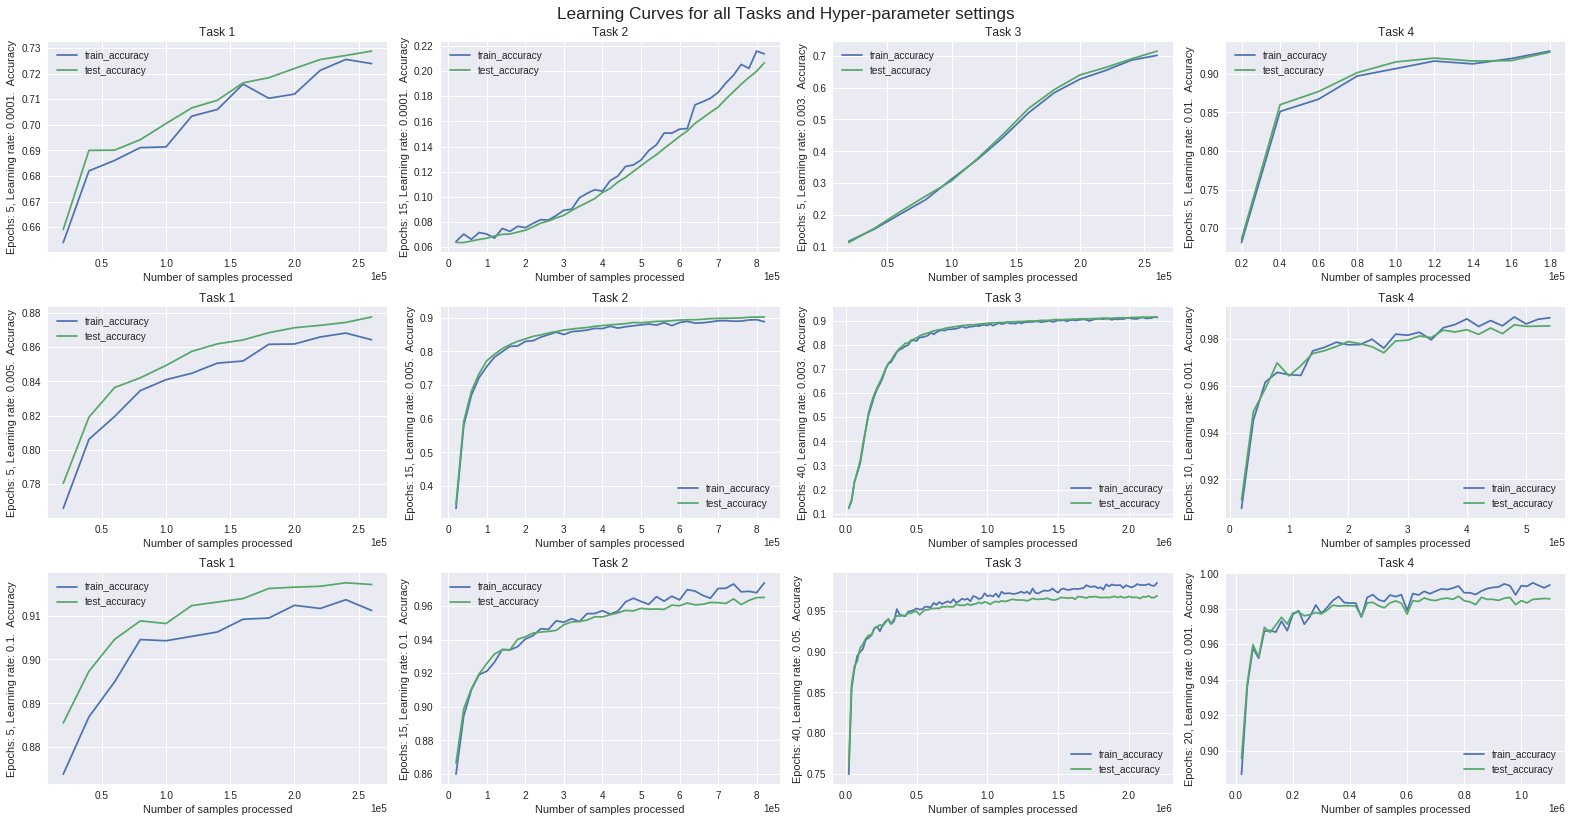

In [20]:
plot_learning_curves([experiments_task1, experiments_task2, experiments_task3, experiments_task4])

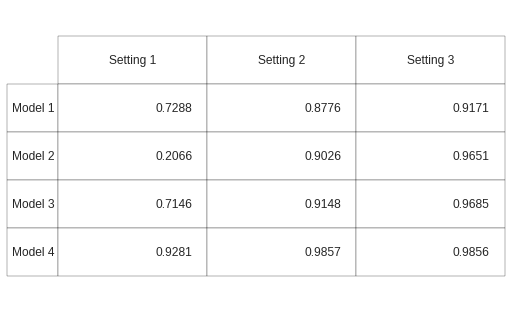

In [21]:
plot_summary_table([experiments_task1, experiments_task2, experiments_task3, experiments_task4])

# Questions

###Q1 (32 pts): Compute the following derivatives 
Show all intermediate steps in the derivation (in markdown below). Provide the final results in vector/matrix/tensor form whenever appropiate.

1. [5 pts] Give the cross-entropy loss above, compute the derivative of the loss function with respect to the scores $z$ (the input to the softmax layer). 
$$\frac{\partial loss}{\partial z} = ?$$

2. [12 pts] Consider the first model (M1: linear + softmax). Compute the derivative of the loss with respect to
  * the input $x$
  $$\frac{\partial loss}{\partial x} = ?$$
  * the parameters of the linear layer: weights $W$ and bias $b$
  $$\frac{\partial loss}{\partial W} = ?$$
  $$\frac{\partial loss}{\partial b} = ?$$
  
3. [10 pts] Compute the derivative of a convolution layer wrt. to its parameters W and wrt. to its input (4-dim tensor). Assume a filter of size H x W x D, and stride 1.
  $$\frac{\partial loss}{\partial W} = ?$$


### A1: (Your answer here)
###Question 1
Beacuse 
$$loss=-\sum_{i=1}^N y_{label}\log{(Softmax(z))} $$


So
$$\frac{\partial loss}{\partial z} = \frac{\partial loss}{\partial Softmax}.\frac{\partial Softmax}{\partial z}$$

And
$$
Softmax=\frac{\exp(z[i])}{\sum_{c=1}^{10} \exp(z[c])}
$$

So calculate$\frac{\partial Softmax}{\partial [j]}$, two conditions need to be considered:
- j is equal to i
$$
\frac{\partial Softmax}{\partial z[j]}=\frac{{\exp(z[j])}.\sum_{c=1}^{10} \exp(z[c])-exp(z[j]).exp(z[j])}{(\sum_{c=1}^{10} \exp(z[c]))^2}
~~=~~
\frac{exp(z[j])}{\sum_{c=1}^{10} \exp(z[c])}-\frac{exp(z[j])}{\sum_{c=1}^{10} \exp(z[c])}.\frac{exp(z[j])}{\sum_{c=1}^{10} \exp(z[c])}
~~=~~Softmax(z[j])(1-Softmax(z[j])
$$
- j is not equal to i
$$
\frac{\partial Softmax}{\partial z[j]}=\frac{0.\sum_{c=1}^{10} \exp(z[c])-exp(z[j]).exp(z[i])}{(\sum_{c=1}^{10} \exp(z[c]))^2}
~~=~~
\frac{exp(z[j])}{\sum_{c=1}^{10} \exp(z[c])}.\frac{exp(z[i])}{\sum_{c=1}^{10} \exp(z[c])}
~~=~~
-Softmax(z[j])Softmax(z[i])
$$

$$\frac{\partial loss}{\partial z} = -\sum_{i=1}^N\frac{\partial y_{label}\log{(Softmax(z))}}{\partial Softmax}.\frac{\partial Softmax}{\partial z}
~~=~~
-\sum_{i=1}^N y_{label}\frac{1}{ Softmax}.\frac{\partial Softmax}{\partial z}
$$

$$
\frac{\partial loss}{\partial z[i]}=-y_{label}[i](1-Softmax(Z[i]))-\sum_{c=/=i}^{10}y_{label}[c]\frac{1}{ Softmax(z[c])}.(-Softmax(z[c]).Softmax(z[i]))
$$

$$=-y_{label}[i](1-Softmax(Z[i]))+\sum_{c=/=i}^{10}y_{label}[c]Softmax(z[i])
~~=~~
Softmax(z[i])(y_{label}[i]+\sum_{c=/=i}^{10}y_{label}[c])-y_{label}[i]
$$
Because $y$ is one hot encoded vector for the labels, so $\sum_{c}^{10}y_{label}[c]=1$, and $y_{label}[i]+\sum_{c=/=i}^{10}y_{label}[c]=1$. So we have:

$$
\frac{\partial loss}{\partial z[i]}=Softmax(z[i])-y_{label}[i]
$$
###Question 2
  
Because  $\frac{\partial loss}{\partial x} = \frac{\partial loss}{\partial z}\frac{\partial z}{\partial x}$, and $\frac{\partial z}{\partial x}=w$, so:
$$
\frac{\partial loss}{\partial x} = \frac{\partial loss}{\partial z}\frac{\partial z}{\partial x} =(Softmax(z[i])-y_{label}[i]).w
$$

Because  $\frac{\partial loss}{\partial b} = \frac{\partial loss}{\partial z}\frac{\partial z}{\partial b}$, and $\frac{\partial z}{\partial b}=1$, so:
$$
\frac{\partial loss}{\partial b} = \frac{\partial loss}{\partial z}\frac{\partial z}{\partial b} =Softmax(z[i])-y_{label}[i]
$$


Because  $\frac{\partial loss}{\partial w} = \frac{\partial loss}{\partial z}\frac{\partial z}{\partial w}$, and $\frac{\partial z}{\partial w}=x$, so:
$$
\frac{\partial loss}{\partial w} = \frac{\partial loss}{\partial z}\frac{\partial z}{\partial w} =(Softmax(z[i])-y_{label}[i]).x
$$


  
###Question 3

In the process of forward propagation convolution layer, $z_{ij}^k=（w^k*x)_{ij}$, i and j are the position, and k is the depth of the filter. x is a 4 dim input, and w is a $H*W*D$ filter.

  $$\frac{\partial loss}{\partial W} = \frac{\partial loss}{\partial Conv}\frac{\partial Conv}{\partial w}
  $$
  
  $$\frac{\partial loss}{\partial W_{H,W}^D} = \sum_{u,v}(\frac{\partial loss}{\partial Conv}_{H,W}^D)_{u,v}(x_{H,W}^D)_{u,v}
  $$
  $x_{H,W}^D$ is a $H*W$ patch, and the center pisition of this patch in input is $(u,v)$

### Q2 (8 pts): How do the results compare to the ones you got when implementing these models in TensorFlow? 
1. [4 pts] For each of the models, please comment on any differences or discrepancies in results -- runtime, performance and stability in training and final performance. (This would be the place to justify design decisions in the implementation and their effects).
2. [2 pts] Which of the models show under-fitting?
3. [2 pts] Which of the models show over-fitting?

### A2: (Your answer here)
### Question1:
Model 1: The running time for model 1 is ok, but the all model-1 3 settings results have the lowest accuracy, and this is because linear model is too simple for training. Hence, model 1 result is unstable.

Model 2: The running time for model 2 is ok, but the model-2 first setting results have the low training and test accuracy, and this is because the learning rate(0.0001) is too small.

Model 3: The running time for model 3 is much more than model 1 and 2, because the network is more complicate than previous model. This my code, i use many loops in forward propagation and backward propagation, and this speed more time for program to train the models. The model-3 result is very stable. The setting 1 result is lower than setting 2 and 3, and this is because the number of epochs is too small.

Model 4: The running time for model 4 is around 10 hours, and i speed all the night to finish training. The result is good, both test and training accuracy are good. Hence the result is not very stable.

### Question2:
In the experiments above, model 2 first setting (num_epochs=15, learning_rate=0.0001) are examples of under-fitting. This is because the netowrk is too simple for training data.
### Question3:
In the experiments above, model 2，3 and 4 third setting are examples of over-fitting. This is because the netowrk is too complex for training data.